<a href="https://colab.research.google.com/github/hosseinrezaie0/CI-T.A-Dr.Helmi/blob/main/Neural%20Network/MLP/Iris/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the datast
data = pd.read_csv('/content/iris.data', header=None)
with open('/content/iris.names', 'r') as f:
    print(f.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [3]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# encoder = LabelEncoder()
# data['class'] = encoder.fit_transform(data['class'])

In [7]:
data['class'] = data['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

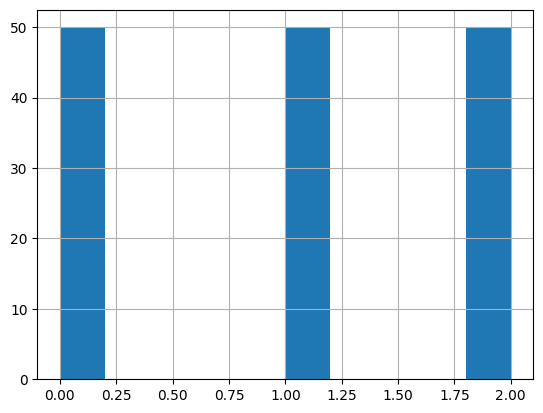

In [9]:
data['class'].hist()

In [10]:
data.shape

(150, 5)

In [11]:
X = data.drop('class', axis=1)
y = data['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape

(120, 4)

In [14]:
y_train.shape

(120,)

In [15]:
x_test.shape

(30, 4)

In [16]:
y_test.shape

(30,)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [18]:
model = Sequential(
    [
        Dense(10, activation='relu', input_shape=(X.shape[1],)),
        Dense(10, activation='relu'),
        Dense(3, activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.6964 - loss: 0.9290 - val_accuracy: 0.6250 - val_loss: 0.9030
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7066 - loss: 0.8779 - val_accuracy: 0.6250 - val_loss: 0.8663
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7826 - loss: 0.8319 - val_accuracy: 0.7083 - val_loss: 0.8302
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7102 - loss: 0.8236 - val_accuracy: 0.7083 - val_loss: 0.7921
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8633 - loss: 0.7364 - val_accuracy: 0.7083 - val_loss: 0.7585
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8220 - loss: 0.7120 - val_accuracy: 0.7500 - val_loss: 0.7221
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8357 - loss: 0.6856 - val_accuracy: 0.7917 - val_loss: 0.6894
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8705 - loss: 0.6380 - val_accuracy: 0.7917 - v

In [21]:
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_val = history.history['val_loss']
acc_val = history.history['val_accuracy']

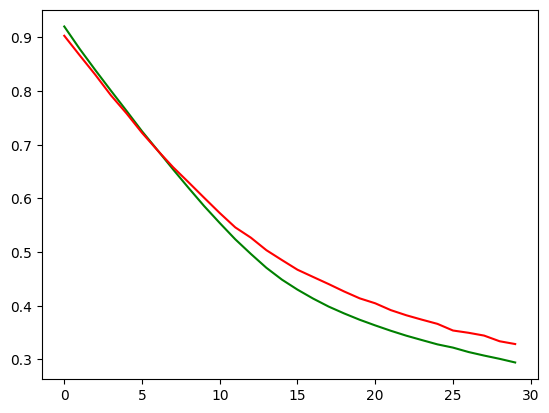

In [22]:
plt.plot(loss_train, label='Training Loss', color='g')
plt.plot(loss_val, label='Validation Loss', color='r')
